<a href="https://colab.research.google.com/github/alexa12mora/AnalisisDatos/blob/Alexa/Laboratorio_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv('/content/sample_data/casasboston.csv')
data = pd.DataFrame(datos)
print(data)

           TOWN      LON      LAT  MEDV     CRIM    ZN  INDUS  CHAS    NOX  \
0        Nahant -70.9550  42.2550  24.0  0.00632  18.0   2.31     0  0.538   
1    Swampscott -70.9500  42.2875  21.6  0.02731   0.0   7.07     0  0.469   
2    Swampscott -70.9360  42.2830  34.7  0.02729   0.0   7.07     0  0.469   
3    Marblehead -70.9280  42.2930  33.4  0.03237   0.0   2.18     0  0.458   
4    Marblehead -70.9220  42.2980  36.2  0.06905   0.0   2.18     0  0.458   
..          ...      ...      ...   ...      ...   ...    ...   ...    ...   
501    Winthrop -70.9860  42.2312  22.4  0.06263   0.0  11.93     0  0.573   
502    Winthrop -70.9910  42.2275  20.6  0.04527   0.0  11.93     0  0.573   
503    Winthrop -70.9948  42.2260  23.9  0.06076   0.0  11.93     0  0.573   
504    Winthrop -70.9875  42.2240  22.0  0.10959   0.0  11.93     0  0.573   
505    Winthrop -70.9825  42.2210  19.0  0.04741   0.0  11.93     0  0.573   

        RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
0 

In [3]:
df = datos[["RM","CRIM","MEDV","TOWN","CHAS"]]

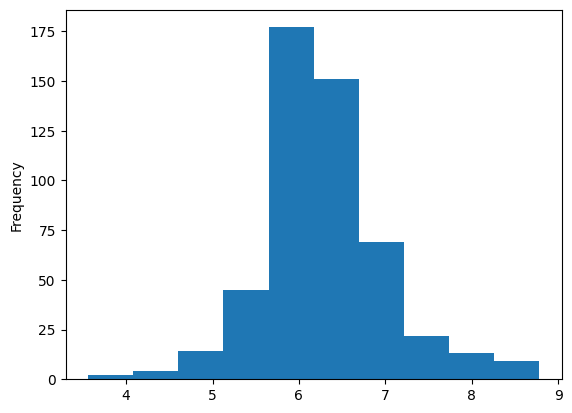

In [6]:
df = datos.rename(columns={
    "TOWN": "CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "INDUS":"PCT_ZONA_INSDUSTRIAL",
    "CHAS":"RIOS CHARLES",
    "RM": "H_HABITACIONES_MEDIO",
    "MEDV": "VALOR_MEDIANO",
    "LSTAT": "PCT_CLASE_BAJA"
})

df.H_HABITACIONES_MEDIO.plot.hist()
plt.show()

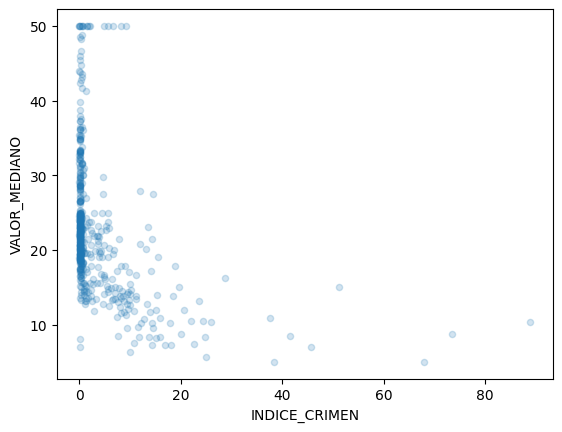

In [7]:
df.plot.scatter(x="INDICE_CRIMEN",y="VALOR_MEDIANO",alpha=0.2)
plt.show()

In [8]:
valor_por_ciudad=df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()

<Axes: ylabel='CIUDAD'>

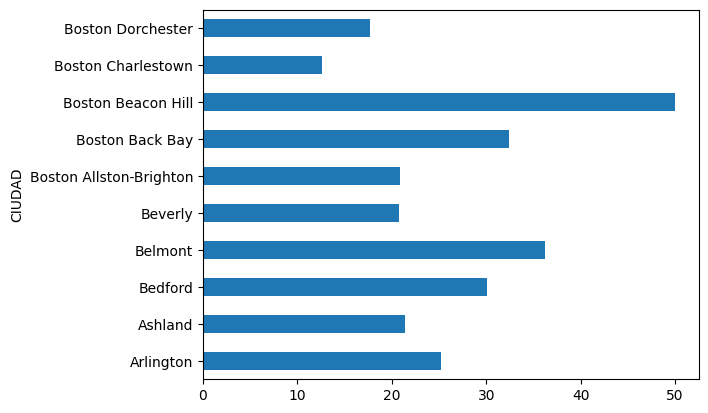

In [9]:
valor_por_ciudad.head(10).plot.barh()

In [10]:
import seaborn as sns
#sirve para mapas de calor

table = pd.crosstab(df['INDICE_CRIMEN'],df['VALOR_MEDIANO'])
print(table)

VALOR_MEDIANO  5.0   5.6   6.3   7.0   7.2   7.4   7.5   8.1   8.2   8.3   \
INDICE_CRIMEN                                                               
0.00632           0     0     0     0     0     0     0     0     0     0   
0.00906           0     0     0     0     0     0     0     0     0     0   
0.01096           0     0     0     0     0     0     0     0     0     0   
0.01301           0     0     0     0     0     0     0     0     0     0   
0.01311           0     0     0     0     0     0     0     0     0     0   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
45.74610          0     0     0     1     0     0     0     0     0     0   
51.13580          0     0     0     0     0     0     0     0     0     0   
67.92080          1     0     0     0     0     0     0     0     0     0   
73.53410          0     0     0     0     0     0     0     0     0     0   
88.97620          0     0     0     0     0     0     0     0     0     0   

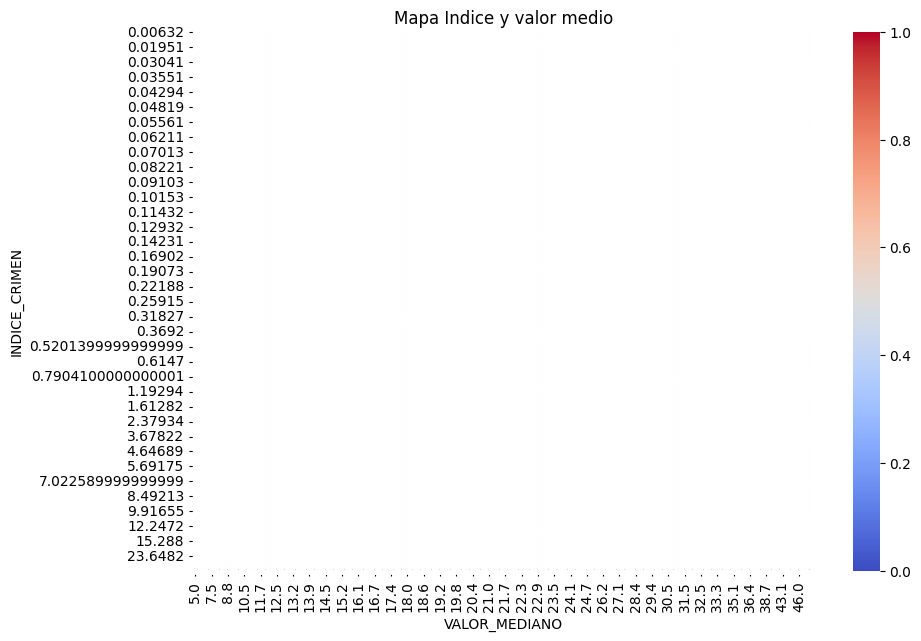

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(table,annot=True,cmap="coolwarm")
plt.title('Mapa Indice y valor medio')
plt.show()



In [21]:
from folium.plugins import MiniMap
import folium

Heredia = folium.Map(location=(8.888348, -82.774175))